## **IMPORT DATA AND NECESSARY MODULES**

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import pickle

# Load your dataset

df = pd.read_csv('/content/PV_Prediction_Data.csv')

# Set 'Time' as the index and ensure it's in datetime format
#df['Time'] = pd.to_datetime(df['Time'])
df['Time'] = pd.to_datetime(df['Time'], format='%d.%m. %H:%M')
df['Time'] = df['Time'].apply(lambda x: x.replace(year=2022))
df.set_index('Time', inplace=True)
df.sort_index(inplace=True)  # Sorting just in case

# Split the data: 75% for training and 25% for testing
train_size = int(len(df) * 0.75)
train, test = df.iloc[:train_size], df.iloc[train_size:]



In [2]:
# Selected columns (excluding the target variable 'PV energy (DC)')
features = [
    "Irradiance onto horizontal plane ", "Outside Temperature ",
    "Global radiation - horizontal ", "Deviation from standard spectrum ",
    "Ground Reflection (Albedo) ", "Orientation and inclination of the module surface ",
    "Shading ", "Reflection on the Module Interface ",
    "Irradiance on the rear side of the module ", "Global Radiation at the Module ",
    "Global PV Radiation ", "STC Conversion (Rated Efficiency of Module) "
]

X_train = train[features]
y_train = train["PV energy (DC) "]
X_test = test[features]
y_test = test["PV energy (DC) "]


In [3]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


##**LINEAR REGRESSION**

Linear Regression MSE: 0.022152921591048473
Linear Regression MAE: 0.08856172354187741
Linear Regression RMSE: 0.14883857561481995
Linear Regression R^2: 0.997368794724687


Text(0.5, 1.0, 'Actual vs Predicted: Linear Regression')

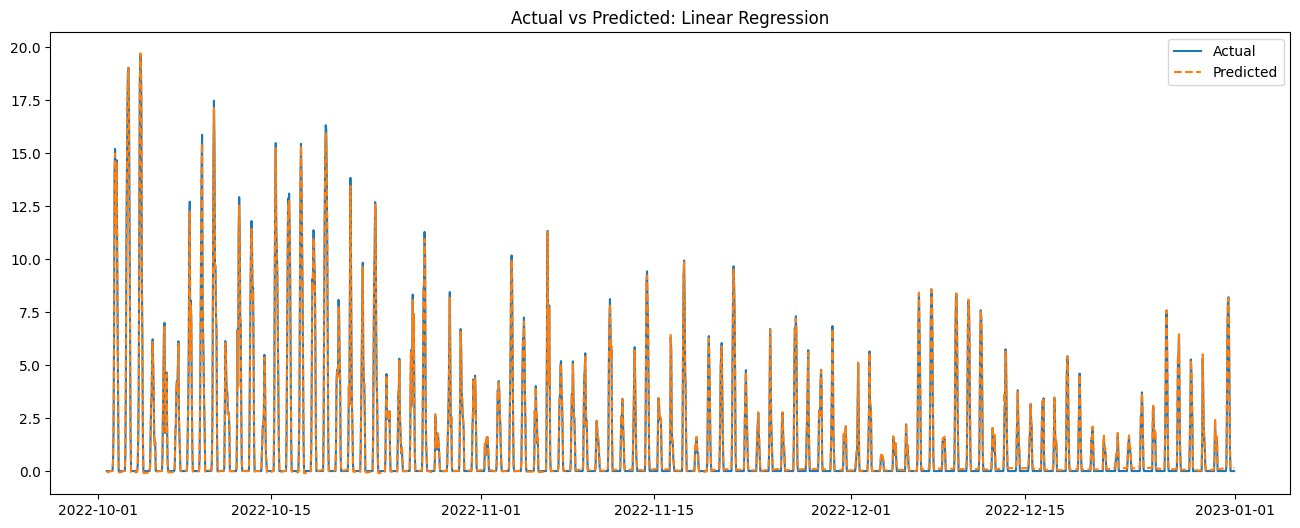

In [4]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

# Metrics
print(f"Linear Regression MSE: {mean_squared_error(y_test, lr_pred)}")
print(f"Linear Regression MAE: {mean_absolute_error(y_test, lr_pred)}")
print(f"Linear Regression RMSE: {np.sqrt(mean_squared_error(y_test, lr_pred))}")
print(f"Linear Regression R^2: {r2_score(y_test, lr_pred)}")

# Actual vs Predicted plot
plt.figure(figsize=(16,6))
plt.plot(X_test.index, y_test, label='Actual')
plt.plot(X_test.index, lr_pred, label='Predicted', linestyle='dashed')
plt.legend()
plt.title("Actual vs Predicted: Linear Regression")



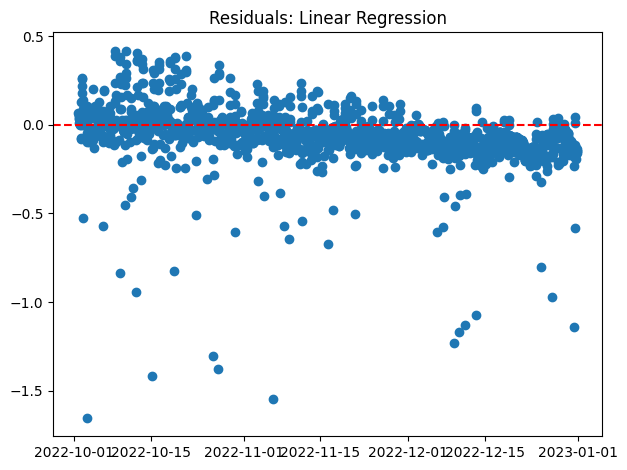

In [5]:
# Residual plot
residuals = y_test - lr_pred
plt.scatter(y_test.index, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals: Linear Regression")

plt.tight_layout()
plt.show()


In [6]:
# save the model to disk
filename = 'Linear_regression.sav'
pickle.dump(lr_model, open(filename, 'wb'))

##**RIDGE REGRESSION**

Best parameters for Ridge Regression: {'alpha': 10}
Ridge Regression MSE after tuning: 0.022081959766551803
Ridge Regression MAE after tuning: 0.08820967487287164
Ridge Regression RMSE after tuning: 0.1485999992145081
Ridge Regression R^2 after tuning: 0.9973772231898081


Text(0.5, 1.0, 'Actual vs Predicted: Ridge Regression')

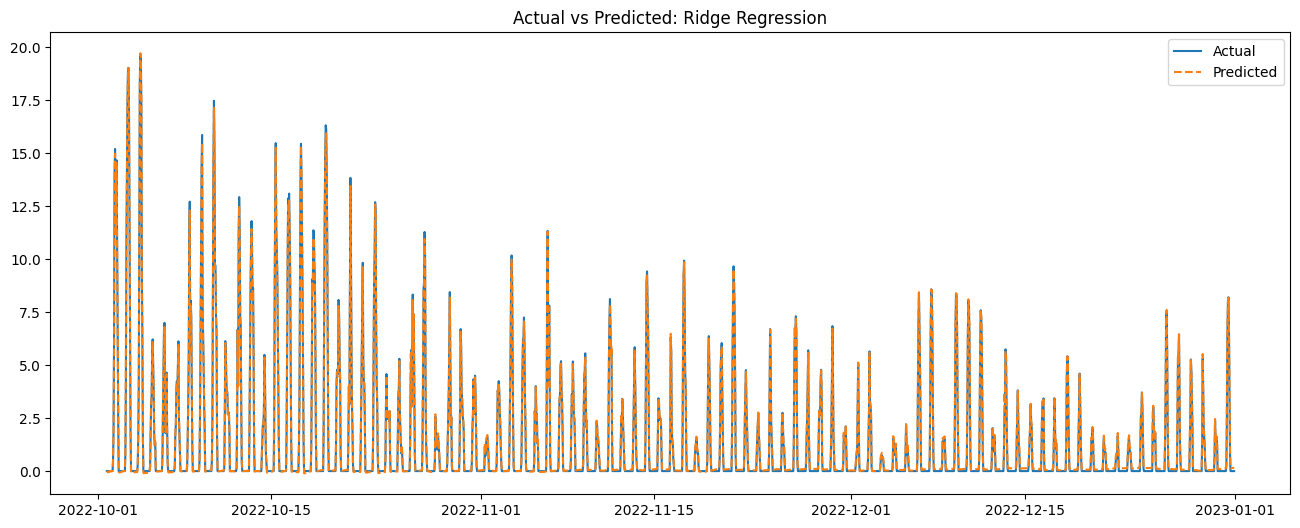

In [7]:
# Ridge Regression
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_scaled, y_train)

# Best Parameters
best_ridge_params = ridge_grid.best_params_
print(f"Best parameters for Ridge Regression: {best_ridge_params}")

# Train model with best parameters and Predict
ridge_model_best = Ridge(**best_ridge_params)
ridge_model_best.fit(X_train_scaled, y_train)
ridge_pred_tuned = ridge_model_best.predict(X_test_scaled)

# Metrics
print(f"Ridge Regression MSE after tuning: {mean_squared_error(y_test, ridge_pred_tuned)}")
print(f"Ridge Regression MAE after tuning: {mean_absolute_error(y_test, ridge_pred_tuned)}")
print(f"Ridge Regression RMSE after tuning: {np.sqrt(mean_squared_error(y_test, ridge_pred_tuned))}")
print(f"Ridge Regression R^2 after tuning: {r2_score(y_test, ridge_pred_tuned)}")

# Actual vs Predicted plot
plt.figure(figsize=(16,6))
plt.plot(X_test.index, y_test, label='Actual')
plt.plot(X_test.index, ridge_pred_tuned, label='Predicted', linestyle='dashed')
plt.legend()
plt.title("Actual vs Predicted: Ridge Regression")



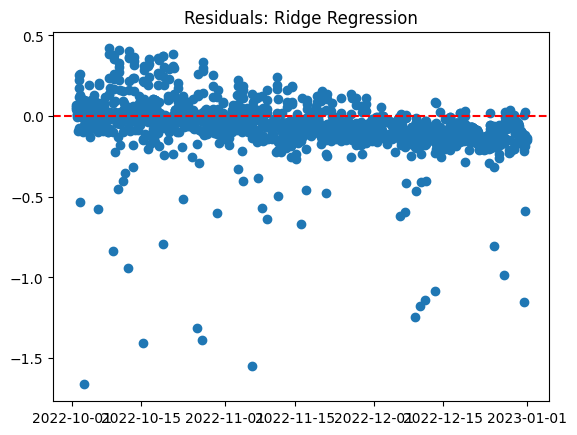

In [8]:
# Residual plot
residuals = y_test - ridge_pred_tuned
plt.scatter(y_test.index, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals: Ridge Regression")

#plt.tight_layout()
plt.show()


In [9]:
filename = 'Ridge_regression.sav'
pickle.dump(ridge_model_best, open(filename, 'wb'))

##**LASSO REGRESSION**

Best parameters for Lasso Regression: {'alpha': 0.01}
Lasso Regression MSE after tuning: 0.020803893551362036
Lasso Regression MAE after tuning: 0.08256967864564062
Lasso Regression RMSE after tuning: 0.14423554884757792
Lasso Regression R^2 after tuning: 0.9975290250437435


Text(0.5, 1.0, 'Actual vs Predicted: Lasso Regression')

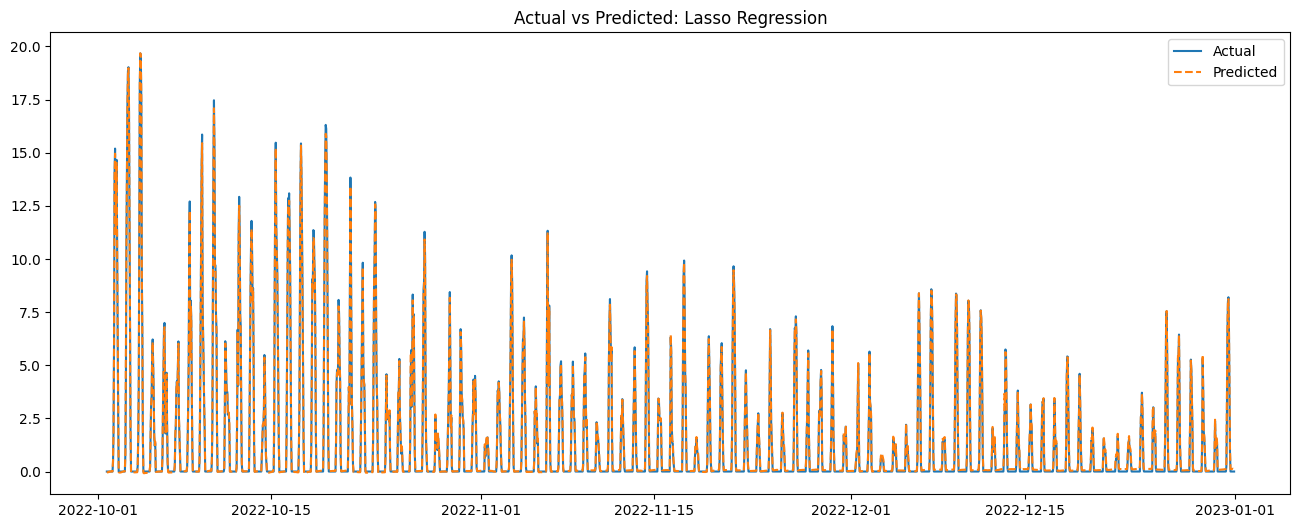

In [10]:

# Lasso Regression
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train_scaled, y_train)

# Best Parameters
best_lasso_params = lasso_grid.best_params_
print(f"Best parameters for Lasso Regression: {best_lasso_params}")

# Train model with best parameters and Predict
lasso_model_best = Lasso(**best_lasso_params)
lasso_model_best.fit(X_train_scaled, y_train)
lasso_pred_tuned = lasso_model_best.predict(X_test_scaled)

# Metrics
print(f"Lasso Regression MSE after tuning: {mean_squared_error(y_test, lasso_pred_tuned)}")
print(f"Lasso Regression MAE after tuning: {mean_absolute_error(y_test, lasso_pred_tuned)}")
print(f"Lasso Regression RMSE after tuning: {np.sqrt(mean_squared_error(y_test, lasso_pred_tuned))}")
print(f"Lasso Regression R^2 after tuning: {r2_score(y_test, lasso_pred_tuned)}")

# Actual vs Predicted plot
plt.figure(figsize=(16,6))
plt.plot(X_test.index, y_test, label='Actual')
plt.plot(X_test.index, lasso_pred_tuned, label='Predicted', linestyle='dashed')
plt.legend()
plt.title("Actual vs Predicted: Lasso Regression")



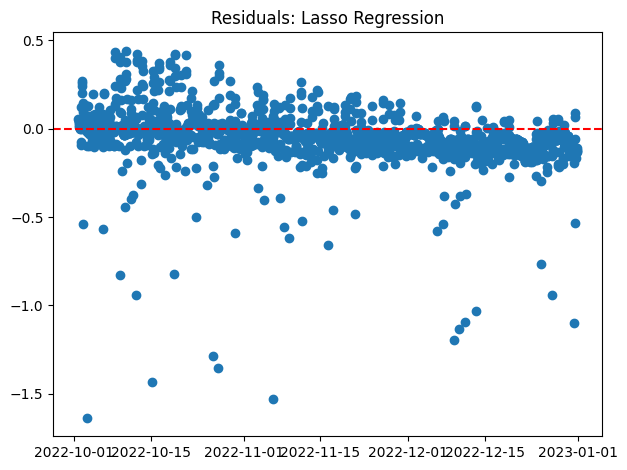

In [11]:
# Residual plot
residuals = y_test - lasso_pred_tuned
plt.scatter(y_test.index, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals: Lasso Regression")

plt.tight_layout()
plt.show()


In [12]:
filename = 'Lasso_regression.sav'
pickle.dump(lasso_model_best, open(filename, 'wb'))

##**DECISION TREES**

Best parameters for Decision Trees: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5}
Decision Trees MSE after tuning: 0.008682423311716762
Decision Trees MAE after tuning: 0.02533977549467274
Decision Trees RMSE after tuning: 0.0931795219547555
Decision Trees R^2 after tuning: 0.9989687483013744


Text(0.5, 1.0, 'Actual vs Predicted: Decision Trees')

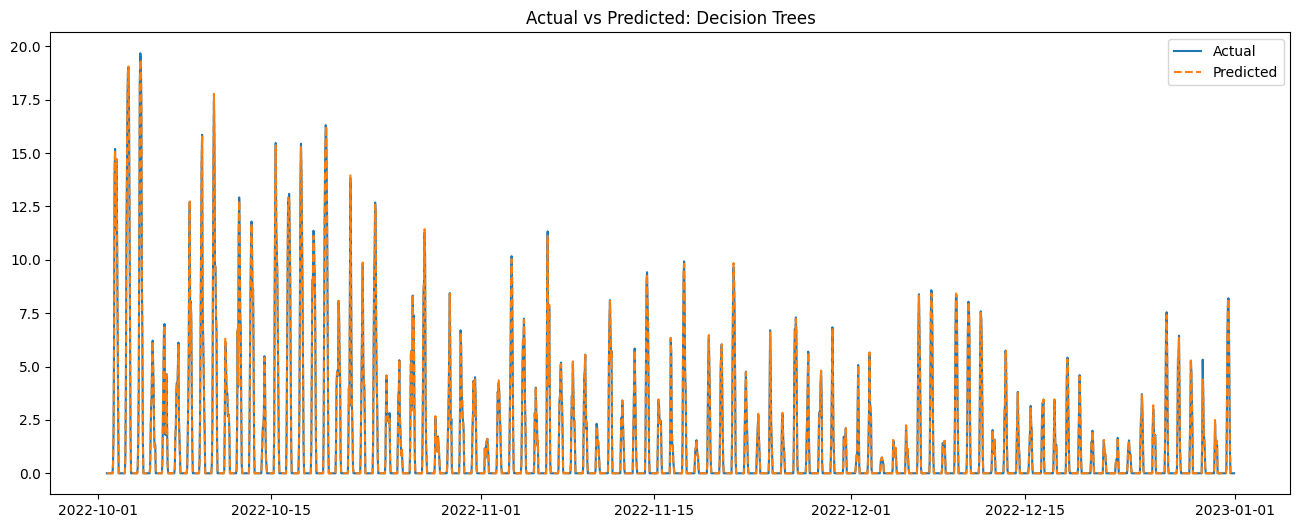

In [13]:
# Decision Trees
dt_params = {'max_depth': [None, 5, 10, 15, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
dt_grid = GridSearchCV(DecisionTreeRegressor(), dt_params, cv=5, scoring='neg_mean_squared_error')
dt_grid.fit(X_train_scaled, y_train)

# Best Parameters
best_dt_params = dt_grid.best_params_
print(f"Best parameters for Decision Trees: {best_dt_params}")

# Train model with best parameters and Predict
dt_model_best = DecisionTreeRegressor(**best_dt_params)
dt_model_best.fit(X_train_scaled, y_train)
dt_pred_tuned = dt_model_best.predict(X_test_scaled)

# Metrics
print(f"Decision Trees MSE after tuning: {mean_squared_error(y_test, dt_pred_tuned)}")
print(f"Decision Trees MAE after tuning: {mean_absolute_error(y_test, dt_pred_tuned)}")
print(f"Decision Trees RMSE after tuning: {np.sqrt(mean_squared_error(y_test, dt_pred_tuned))}")
print(f"Decision Trees R^2 after tuning: {r2_score(y_test, dt_pred_tuned)}")

# Actual vs Predicted plot
plt.figure(figsize=(16,6))
plt.plot(X_test.index, y_test, label='Actual')
plt.plot(X_test.index, dt_pred_tuned, label='Predicted', linestyle='dashed')
plt.legend()
plt.title("Actual vs Predicted: Decision Trees")



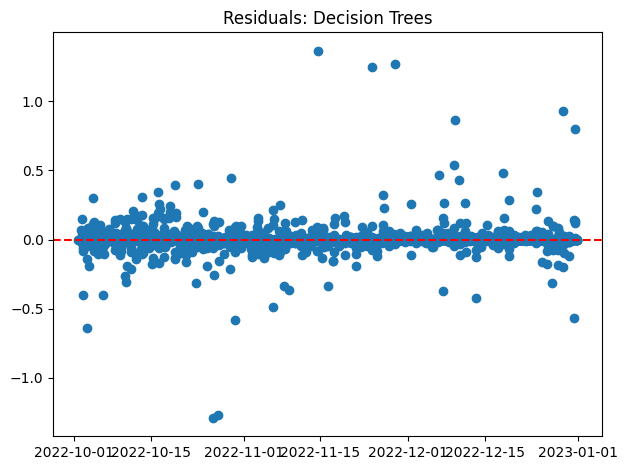

In [14]:
# Residual plot
residuals = y_test - dt_pred_tuned
plt.scatter(y_test.index, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals: Decision Trees")

plt.tight_layout()
plt.show()


In [15]:
# save the model to disk
filename = 'DT_Model.sav'
pickle.dump(dt_model_best, open(filename, 'wb'))

##**RANDOM FOREST**

Best parameters for Random Forest: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest MSE after tuning: 0.005650236186929785
Random Forest MAE after tuning: 0.017597942419965918
Random Forest RMSE after tuning: 0.0751680529675326
Random Forest R^2 after tuning: 0.9993288952339442


Text(0.5, 1.0, 'Actual vs Predicted: Random Forest')

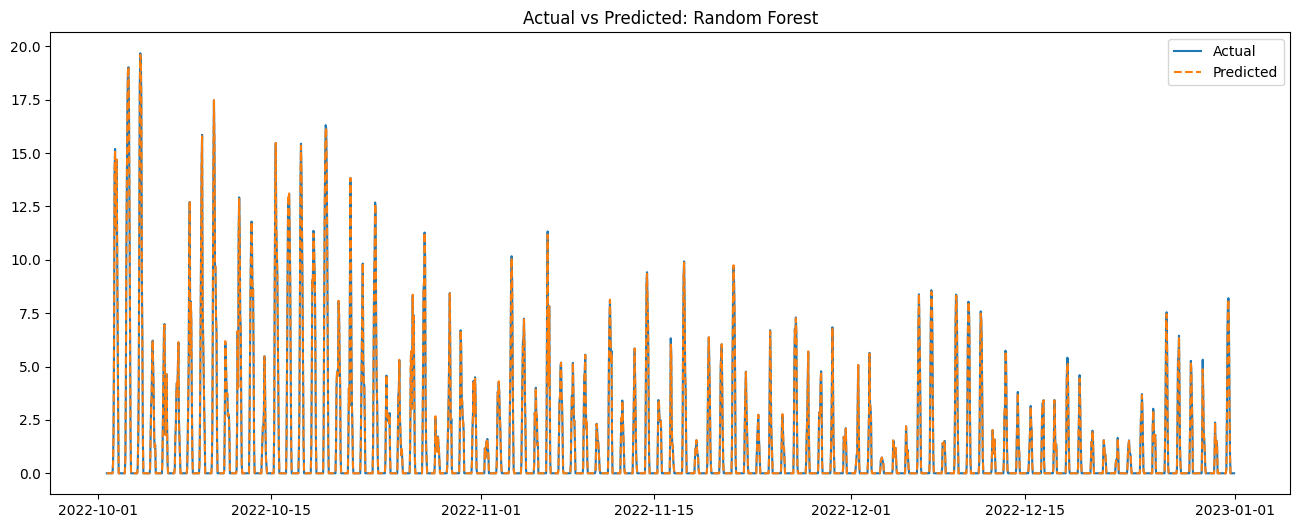

In [16]:
# Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid = GridSearchCV(RandomForestRegressor(), rf_params, cv=5, scoring='neg_mean_squared_error')
rf_grid.fit(X_train_scaled, y_train)

# Best Parameters
best_rf_params = rf_grid.best_params_
print(f"Best parameters for Random Forest: {best_rf_params}")

# Train model with best parameters and Predict
rf_model_best = RandomForestRegressor(**best_rf_params)
rf_model_best.fit(X_train_scaled, y_train)
rf_pred_tuned = rf_model_best.predict(X_test_scaled)

# Metrics
print(f"Random Forest MSE after tuning: {mean_squared_error(y_test, rf_pred_tuned)}")
print(f"Random Forest MAE after tuning: {mean_absolute_error(y_test, rf_pred_tuned)}")
print(f"Random Forest RMSE after tuning: {np.sqrt(mean_squared_error(y_test, rf_pred_tuned))}")
print(f"Random Forest R^2 after tuning: {r2_score(y_test, rf_pred_tuned)}")

# Actual vs Predicted plot
plt.figure(figsize=(16,6))
plt.plot(X_test.index, y_test, label='Actual')
plt.plot(X_test.index, rf_pred_tuned, label='Predicted', linestyle='dashed')
plt.legend()
plt.title("Actual vs Predicted: Random Forest")


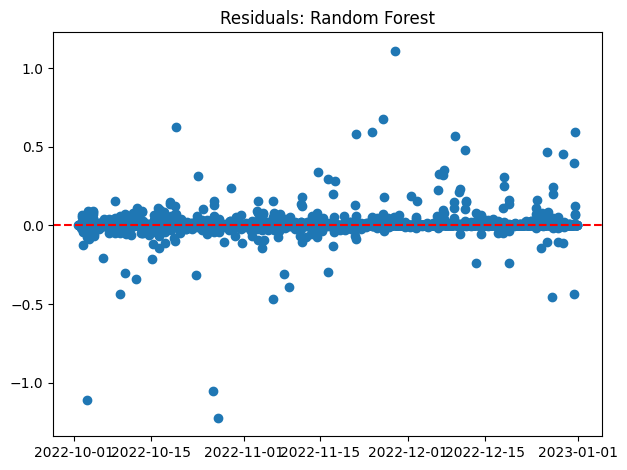

In [17]:
# Residual plot
residuals = y_test - rf_pred_tuned
plt.scatter(y_test.index, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals: Random Forest")

plt.tight_layout()
plt.show()


In [18]:
# save the model to disk
filename = 'RF_Model.sav'
pickle.dump(rf_model_best, open(filename, 'wb'))

##**NEURAL NETWORK**

In [19]:
# Neural Network
nn_params = {
    'hidden_layer_sizes': [(50, 50), (100, 100), (100, 50, 25)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [500, 1000]
}
nn_grid = GridSearchCV(MLPRegressor(), nn_params, cv=5, scoring='neg_mean_squared_error')
nn_grid.fit(X_train_scaled, y_train)
print(f"Best parameters for Neural Network: {nn_grid.best_params_}")
nn_pred_tuned = nn_grid.best_estimator_.predict(X_test_scaled)
print(f"Neural Network MSE after tuning: {mean_squared_error(y_test, nn_pred_tuned)}")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_mult

Best parameters for Neural Network: {'activation': 'relu', 'hidden_layer_sizes': (100, 50, 25), 'learning_rate_init': 0.01, 'max_iter': 500, 'solver': 'adam'}
Neural Network MSE after tuning: 0.007088246031840303


Neural Network MSE after tuning: 0.007088246031840303
Neural Network MAE after tuning: 0.049076448847018936
Neural Network RMSE after tuning: 0.08419172187240444
Neural Network R^2 after tuning: 0.9991580961330522


Text(0.5, 1.0, 'Actual vs Predicted: Neural Network')

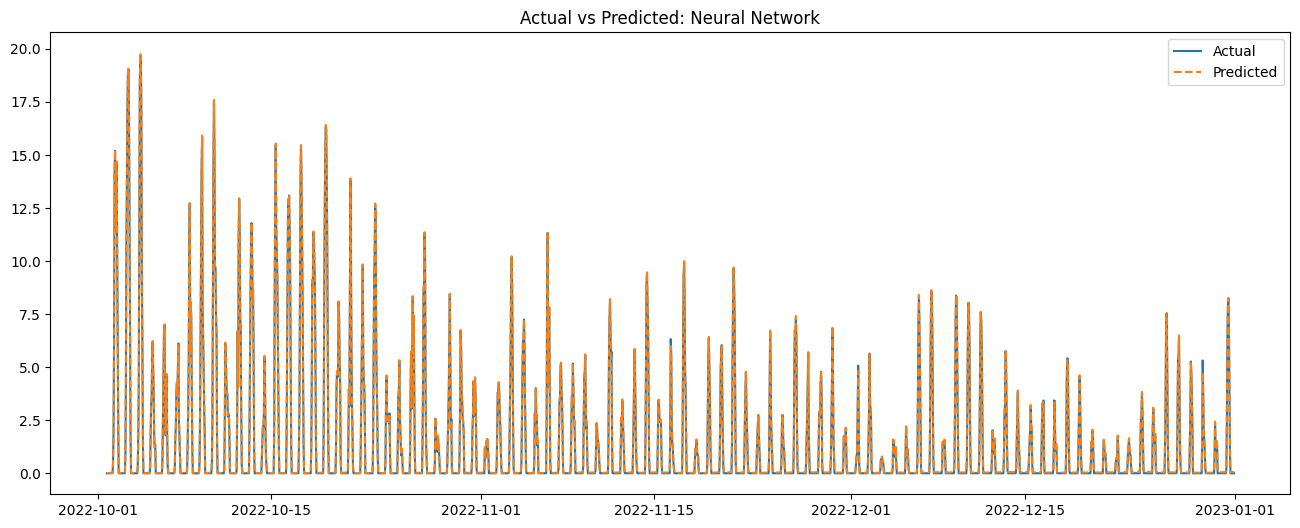

In [20]:
nn_pred_tuned = nn_grid.best_estimator_.predict(X_test_scaled)
#print(f"Neural Network MSE after tuning: {mean_squared_error(y_test, nn_pred_tuned)}")
print(f"Neural Network MSE after tuning: {mean_squared_error(y_test, nn_pred_tuned)}")
print(f"Neural Network MAE after tuning: {mean_absolute_error(y_test, nn_pred_tuned)}")
print(f"Neural Network RMSE after tuning: {np.sqrt(mean_squared_error(y_test, nn_pred_tuned))}")
print(f"Neural Network R^2 after tuning: {r2_score(y_test, nn_pred_tuned)}")

# Actual vs Predicted plot
plt.figure(figsize=(16,6))
plt.plot(X_test.index, y_test, label='Actual')
plt.plot(X_test.index, nn_pred_tuned, label='Predicted', linestyle='dashed')
plt.legend()
plt.title("Actual vs Predicted: Neural Network")


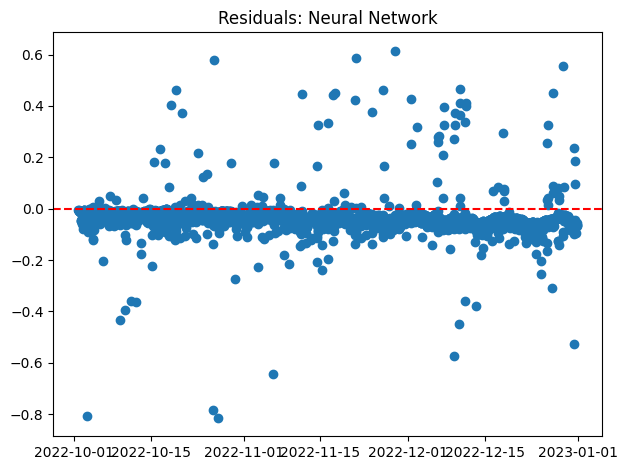

In [21]:
# Residual plot
residuals = y_test - nn_pred_tuned
plt.scatter(y_test.index, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals: Neural Network")

plt.tight_layout()
plt.show()


In [22]:
import joblib

joblib.dump(nn_grid.best_estimator_, 'tuned_neural_network_model.pkl')


['tuned_neural_network_model.pkl']